# Data Visualisation with Pandas

We'll load data that represents trades made in a stock exchange, in which each row represents a day. So we'll need to use the date column as the index, and convert the date from `string` to `datetime`.

In [704]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./BBAS3.SA.csv",
parse_dates=True,
index_col='Date'
)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-21,29.730000,30.580000,29.340000,30.580000,28.680056,16301600
2018-09-24,30.379999,30.700001,29.500000,29.730000,27.882866,13086900
2018-09-25,29.030001,29.760000,28.809999,29.549999,27.714045,11742900
2018-09-26,29.650000,29.969999,29.209999,29.450001,27.620264,12842400
2018-09-27,29.680000,30.299999,29.680000,30.290001,28.408072,8767900
...,...,...,...,...,...,...
2019-09-16,47.040001,47.560001,46.299999,46.650002,46.650002,8175500
2019-09-17,46.389999,47.450001,46.119999,47.299999,47.299999,6744200
2019-09-18,47.459999,48.250000,47.160000,48.020000,48.020000,8528300


In [705]:
# Parsing dates converts them to type datetime.
df.index

DatetimeIndex(['2018-09-21', '2018-09-24', '2018-09-25', '2018-09-26',
               '2018-09-27', '2018-09-28', '2018-10-01', '2018-10-02',
               '2018-10-03', '2018-10-04',
               ...
               '2019-09-09', '2019-09-10', '2019-09-11', '2019-09-12',
               '2019-09-13', '2019-09-16', '2019-09-17', '2019-09-18',
               '2019-09-19', '2019-09-20'],
              dtype='datetime64[ns]', name='Date', length=246, freq=None)

## Creating plots

We can create histograms, boxplots and scatterplots from data easily.

<Axes: xlabel='Date'>

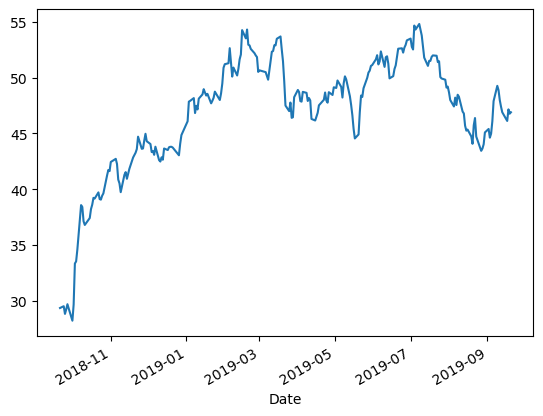

In [706]:
df.Low.plot()

<Axes: >

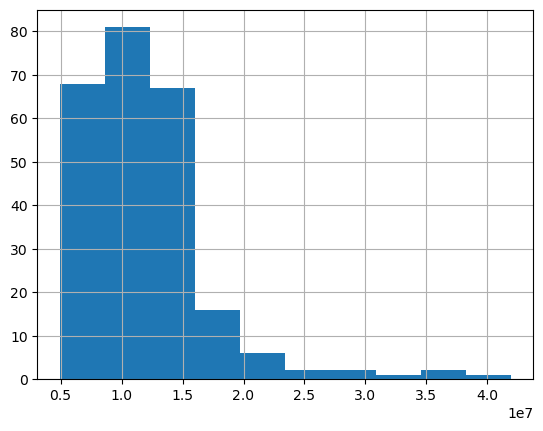

In [707]:
# Plotting a histogram
df.Volume.hist()

<Axes: xlabel='Date'>

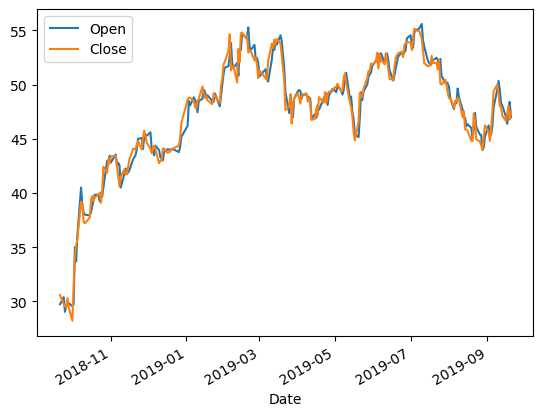

In [708]:
# Plotting line plots

df.Open.plot(legend=True)
df.Close.plot(legend=True)

<Axes: title={'center': 'Transaction volume'}, xlabel='Volume', ylabel='Frequency'>

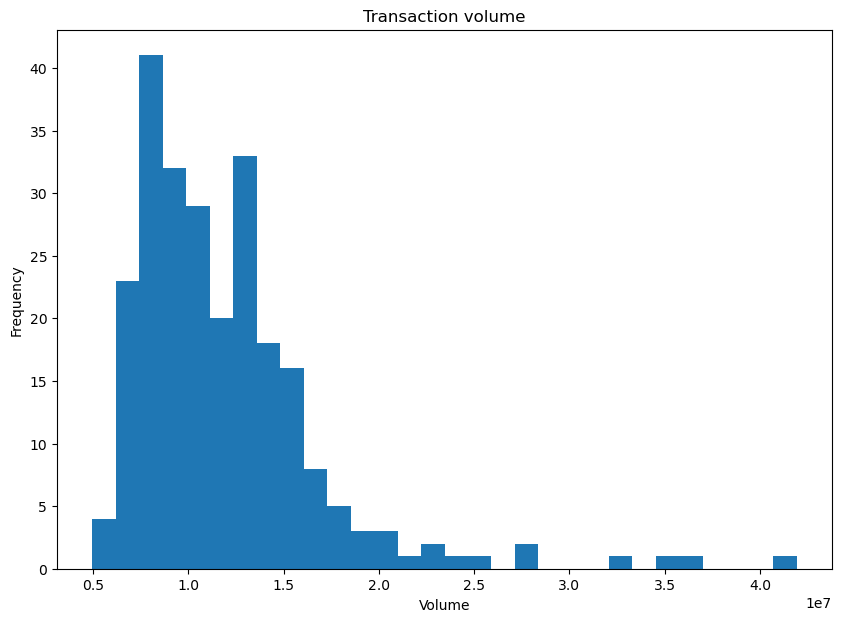

In [709]:
# Increasing the size of plots
plt.figure(figsize = (10,7))

df.Volume.plot(kind ='hist',
               bins = 30,
               title = "Transaction volume",
               xlabel="Volume"
               )

In [710]:
# Importing a new dataset - beer consumption in Brazil

df_cerveja = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/consumo_cerveja_original.csv")
df_cerveja

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [711]:
# Cleaning dataset because there are NaN values we can get rid of before plotting
num_rows_old = len(df_cerveja)
df_cerveja_clean = df_cerveja.dropna(inplace = False)
print(f" Dataset had {num_rows_old} rows, now it has {len(df_cerveja_clean)} rows")

 Dataset had 941 rows, now it has 365 rows


In [712]:
# We often have to change the name of columns to make them easier to work with in our notebook.
df_cerveja_clean.columns = ['date','temp_avg','temp_min','temp_max','rain','weekend','beer_consumption_liters']
df_cerveja_clean

,date,temp_avg,temp_min,temp_max,rain,weekend,beer_consumption_liters
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24,"21,1","28,2","13,6",1.0,32.307
361,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467


In [713]:
# Comma separators should be converted to dot.
df_cerveja_clean.temp_avg = df_cerveja_clean.temp_avg.apply(lambda x: float(x.replace(",",".")))
df_cerveja_clean.temp_min = df_cerveja_clean.temp_min.apply(lambda x: float(x.replace(",",".")))
df_cerveja_clean.temp_max = df_cerveja_clean.temp_max.apply(lambda x: float(x.replace(",",".")))
df_cerveja_clean.rain = df_cerveja_clean.rain.apply(lambda x: float(x.replace(",",".")))
df_cerveja_clean.to_csv("./cerveja_clean.csv",index=False)


/var/folders/7v/g6c1p1ks5c1ch9dd18ws3txr0000gn/T/ipykernel_85468/1727743937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cerveja_clean.temp_avg = df_cerveja_clean.temp_avg.apply(lambda x: float(x.replace(",",".")))
/var/folders/7v/g6c1p1ks5c1ch9dd18ws3txr0000gn/T/ipykernel_85468/1727743937.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cerveja_clean.temp_min = df_cerveja_clean.temp_min.apply(lambda x: float(x.replace(",",".")))
/var/folders/7v/g6c1p1ks5c1ch9dd18ws3txr0000gn/T/ipykernel_854

In [714]:
# Visualising the correlation between average temperature and beer consumption

df_beer = pd.read_csv("./cerveja_clean.csv",
                      parse_dates=True,
                      index_col='date')
df_beer

,temp_avg,temp_min,temp_max,rain,weekend,beer_consumption_liters
date,,,,,,
2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900
...,...,...,...,...,...,...
2015-12-27,24.00,21.1,28.2,13.6,1.0,32.307
2015-12-28,22.64,21.1,26.7,0.0,0.0,26.095
2015-12-29,21.68,20.3,24.1,10.3,0.0,22.309


<Axes: xlabel='Average temperature (C)', ylabel='Beer consumption (L)'>

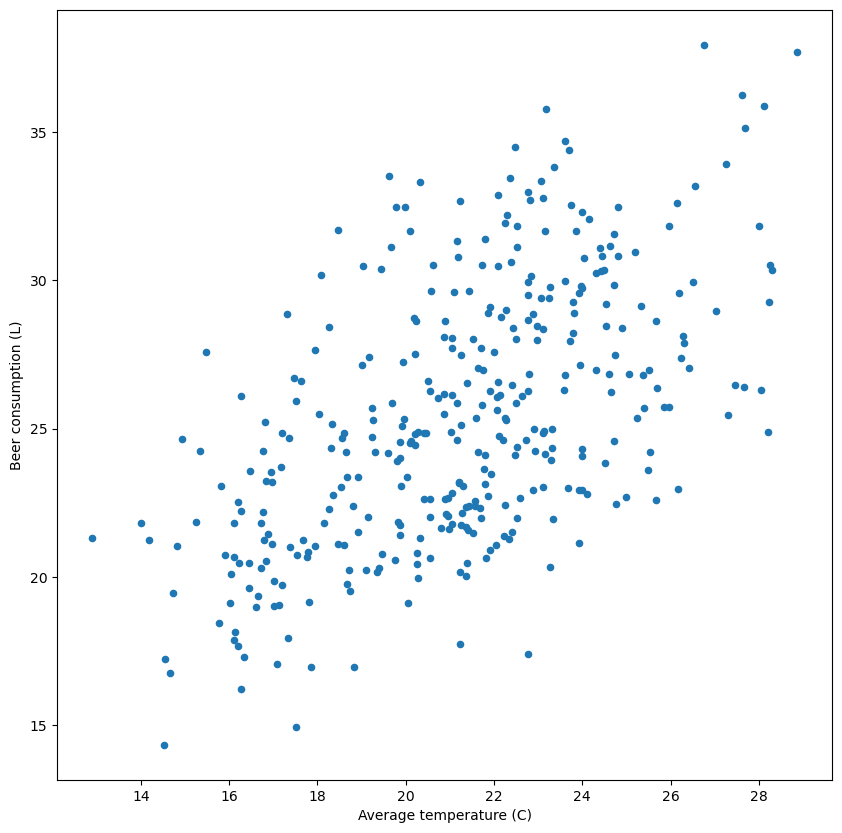

In [715]:
# Beer consumption and average temperature are positively correlated.
df_beer.plot.scatter('temp_avg','beer_consumption_liters',
                     ylabel="Beer consumption (L)",
                     xlabel = "Average temperature (C)",
                     figsize=(10,10)
                     )

<Axes: title={'center': 'Beer consumption (L)'}>

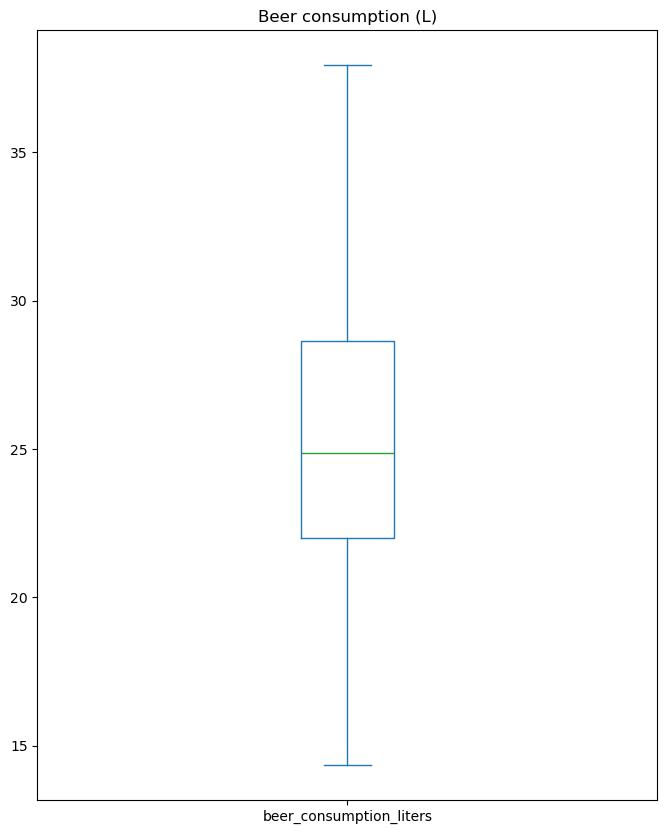

In [716]:
# Boxplots show us percentiles, median, min and max values in one go.
df_beer.beer_consumption_liters.plot(
    kind = 'box',
    figsize = (8,10),
    title = "Beer consumption (L)",
)

<Axes: >

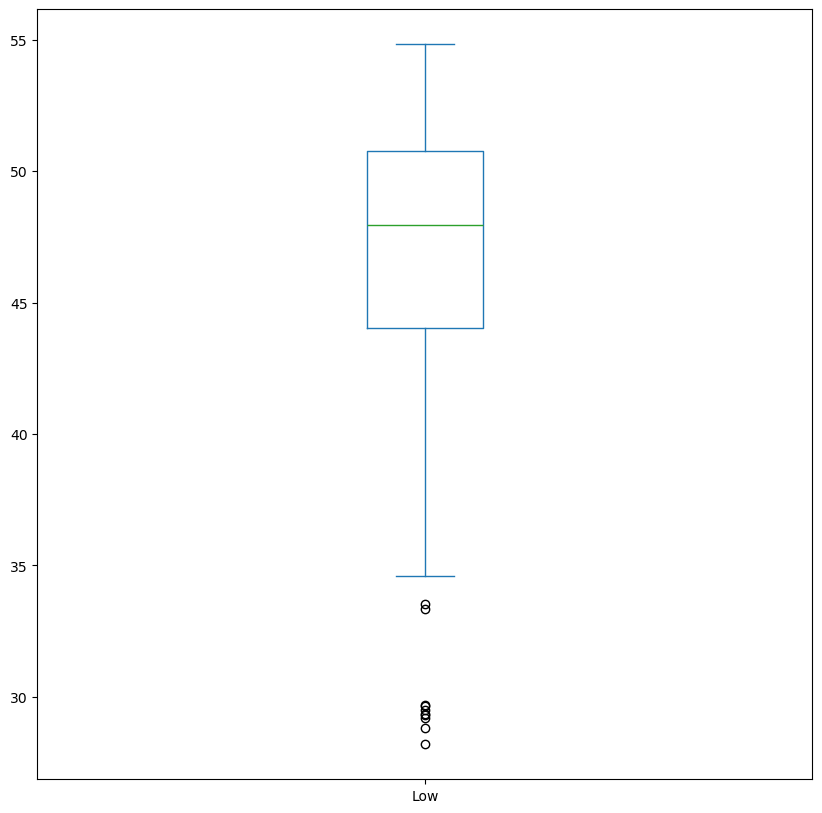

In [717]:
df.Low.plot(kind="box",
             figsize=(10,10))